In [21]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
df2 = pd.read_csv('../Data/df2.csv')

In [23]:
df2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
# Variables a analizar
num_var = ['Survived', 'Age', 'SibSp', 'Parch', 'Fare']

In [25]:
df2 = df2[num_var]

In [93]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Survived    891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


In [26]:
df2.describe()

,Survived,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208
std,0.486592,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


In [76]:
df2.isnull().sum()

Survived      0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [27]:
df2.isnull().sum() / len(df2)*100

Survived     0.00000
Age         19.86532
SibSp        0.00000
Parch        0.00000
Fare         0.00000
dtype: float64

**NOTA** <br>
La variable Age es la unica que contiene valores nulos. Esta variable contiene un 19.86% (177) de valores faltantes 

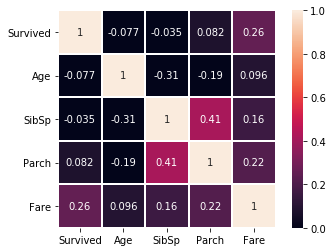

In [38]:
df_corr = df2.corr()

sns.heatmap(df_corr, vmin=0, vmax=1, annot=True, linewidths=1, square=True)

## Variable Age

In [92]:
pd.cut(df2.Age.dropna(), [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]).value_counts()

(20, 30]    230
(30, 40]    155
(10, 20]    115
(40, 50]     86
(0, 10]      64
(50, 60]     42
(60, 70]     17
(70, 80]      5
(80, 90]      0
Name: Age, dtype: int64

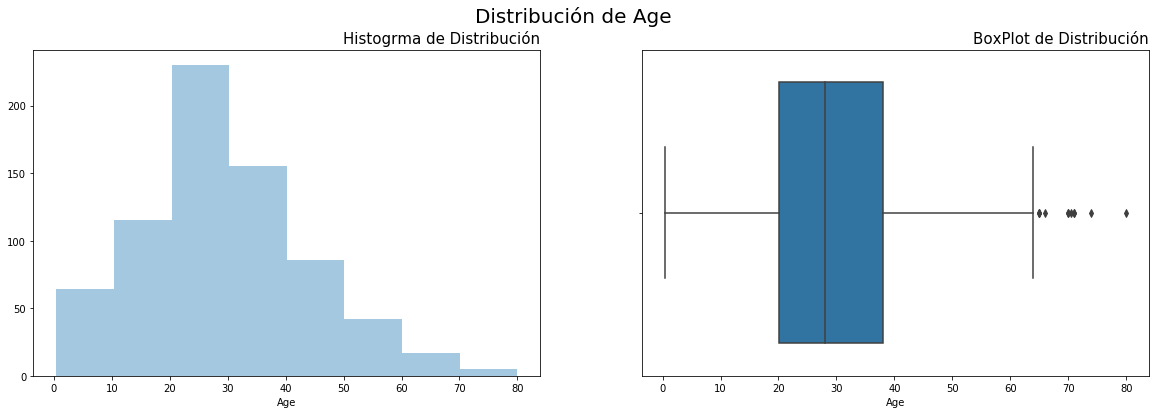

In [79]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Distribución de Age', fontsize=20, fontweight=300)

plt.sca(ax1)
ax1.set_title('Histogrma de Distribución', loc='right', fontsize=15, fontweight=300)
# Create plot:
sns.distplot( a=df2.Age[df2.Age.isnull() == False], hist=True, kde=False, rug=False, bins=8 )


plt.sca(ax2)
ax2.set_title('BoxPlot de Distribución', loc='right', fontsize=15, fontweight=300)
# Create plot:
sns.boxplot(df2.Age[df2.Age.isnull() == False])
plt.show()


## Variable SibSp (siblings / spouses)

In [36]:
# Percent of siblings / spouses by value
df2.SibSp.value_counts() / len(df2)*100

0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: SibSp, dtype: float64

**NOTA** <br>
El 68% de los pasajeros viaja sin hermanos ni esposos <br>
El 91.7% de los pasajeros representan a pasajeros que vijan con 1 o menos hermanos / esposos

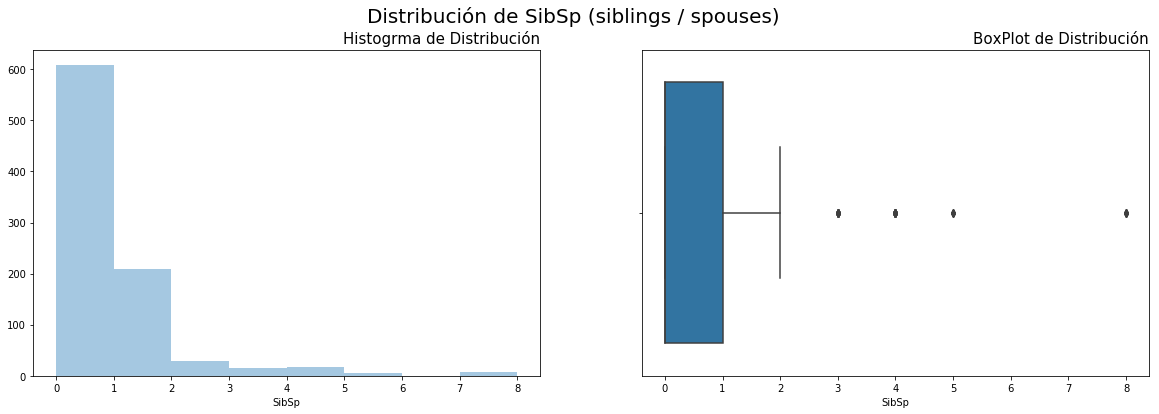

In [75]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Distribución de SibSp (siblings / spouses)', fontsize=20, fontweight=300)

plt.sca(ax1)
ax1.set_title('Histogrma de Distribución', loc='right', fontsize=15, fontweight=300)
# Create plot:
sns.distplot( a=df2.SibSp, hist=True, kde=False, rug=False, bins=8)


plt.sca(ax2)
ax2.set_title('BoxPlot de Distribución', loc='right', fontsize=15, fontweight=300)
# Create plot:
sns.boxplot(df2.SibSp)
plt.show()


## Variable Parch (parents / children)

In [80]:
# Percent of Parch (parents / children) by value
df2.Parch.value_counts() / len(df2)*100

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64

**NOTA** <br>
El 76% de los pasajeros viaja sin padres ni hijos <br>
El 89.2% de los pasajeros representan a pasajeros que vijan con 1 o menos  padres / hijos

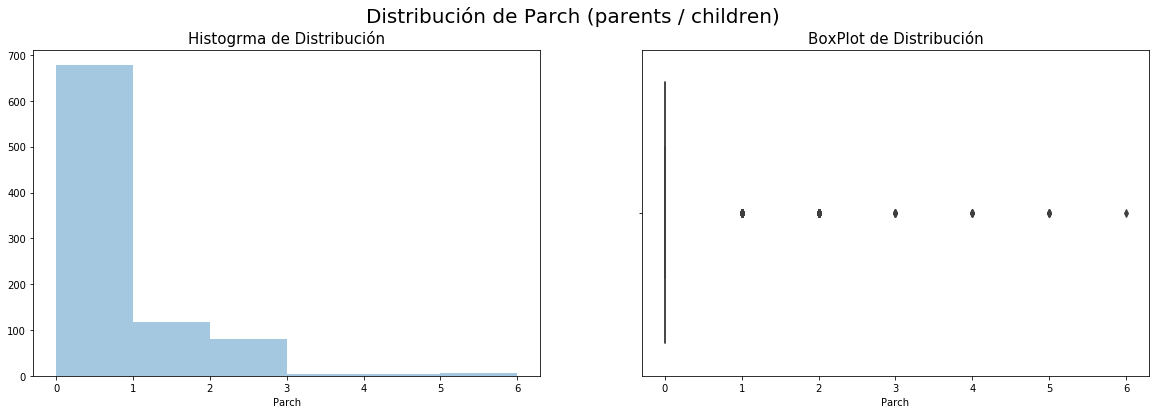

In [72]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Distribución de Parch (parents / children)', fontsize=20, fontweight=300)

plt.sca(ax1)
ax1.set_title('Histogrma de Distribución', fontsize=15, fontweight=300)
# Create plot:
sns.distplot( a=df2.Parch, hist=True, kde=False, rug=False, bins=6)


plt.sca(ax2)
ax2.set_title('BoxPlot de Distribución', fontsize=15, fontweight=300)
# Create plot:
sns.boxplot(df2.Parch)
plt.show()


## Variable Fare


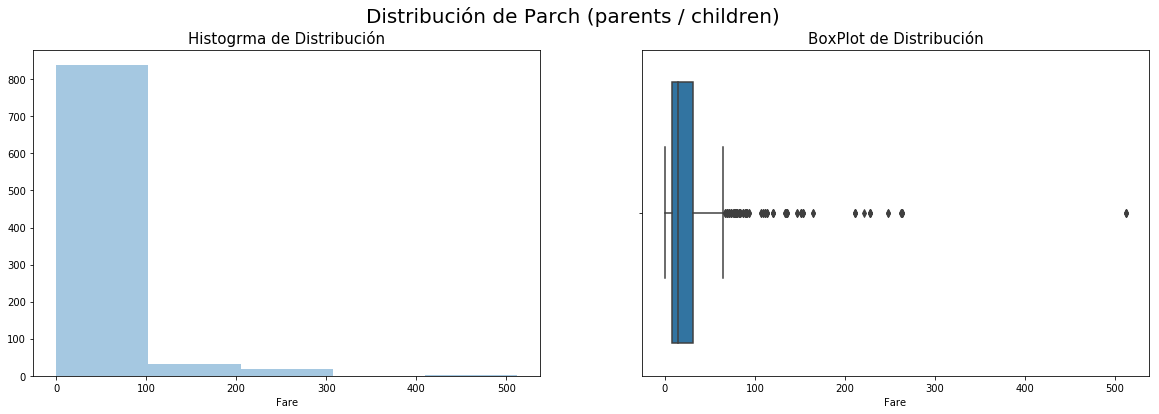

In [73]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(20,6))
fig.suptitle('Distribución de Parch (parents / children)', fontsize=20, fontweight=300)

plt.sca(ax1)
ax1.set_title('Histogrma de Distribución', fontsize=15, fontweight=300)
# Create plot:
sns.distplot( a=df2.Fare, hist=True, kde=False, rug=False, bins=5)


plt.sca(ax2)
ax2.set_title('BoxPlot de Distribución', fontsize=15, fontweight=300)
# Create plot:
sns.boxplot(df2.Fare)
plt.show()
